# Retail Dataset Relationships

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
import re

### Reading in the retail data

In [ ]:
retail = pd.read_csv("pca_retail_building_section_1&4&5_data_items.csv")

retail.head(50)

,id,project_id,document_spot,outside_name,the_data,document_text,section_reference,type
0,64098211,621709,541b_wall1,541b_wall1,"[""Metal""]",metal wall finishes,5.4.1,PcaReportDataItem
1,64099519,621709,542a_esc,are_escalators_present_542,yes,NaN,5.4.2,PcaReportDataItem
2,64099836,621709,551_fire_hydrants,551_fire_hydrants,yes,NaN,5.5.1,PcaReportDataItem
3,64102647,621709,pca_reserve_yn_8a,pca_reserve_yn_8a,no,NaN,1.0,PcaReportDataItem
4,64070020,623951,553b_othrsysdesc,other_systems_description_553,Emergency lighting was typically provided by c...,Emergency lighting was typically provided by c...,5.5.3,PcaReportDataItem
5,64099948,621709,552_smoke_det_loc,552_smoke_det_loc,each commercial tenant space,Smoke detectors were located in each commercia...,5.5.2,PcaReportDataItem
6,64099832,621709,551p_fire_ex_cond,551p_fire_ex_cond,Good,The fire extinguishers appeared to be in good ...,5.5.1,PcaReportDataItem
7,64098144,621709,53m_stablok,federal_pacific_stab_lok_present_53,no,Federal Pacific Electric (FPE) Stab-Lok circui...,5.3,PcaReportDataItem
8,64095621,621709,pca_reserve_yn_36a,pca_reserve_yn_36a,no,NaN,1.0,PcaReportDataItem
9,64098089,621709,53a_transf,transformers_main_electrical_service_delivery_...,Pad-mounted - Multiple,Electrical service was provided via several pa...,5.3,PcaReportDataItem


In [ ]:
retail

,id,project_id,document_spot,outside_name,the_data,document_text,section_reference,type
0,64098211,621709,541b_wall1,541b_wall1,"[""Metal""]",metal wall finishes,5.4.1,PcaReportDataItem
1,64099519,621709,542a_esc,are_escalators_present_542,yes,NaN,5.4.2,PcaReportDataItem
2,64099836,621709,551_fire_hydrants,551_fire_hydrants,yes,NaN,5.5.1,PcaReportDataItem
3,64102647,621709,pca_reserve_yn_8a,pca_reserve_yn_8a,no,NaN,1.0,PcaReportDataItem
4,64070020,623951,553b_othrsysdesc,other_systems_description_553,Emergency lighting was typically provided by c...,Emergency lighting was typically provided by c...,5.5.3,PcaReportDataItem
...,...,...,...,...,...,...,...,...
558412,59679704,609229,53m_stablok,federal_pacific_stab_lok_present_53,none,NaN,5.3,PcaReportDataItem
558413,59604146,609647,441ap_flash_mat,441ap_flash_mat,"[""Similar to roofing membrane""]",Flashing materials appeared to be similar to t...,4.4.1,PcaReportDataItem
558414,59679944,609229,pca_reserve_yn_13a,pca_reserve_yn_13a,no,NaN,1.0,PcaReportDataItem
558415,59679351,609229,01zp_project_county,01zp_project_county,Sussex,Sussex,1,PcaReportDataItem


### Reading in the zip-code-to-state conversion data

In [ ]:
zip_to_state = pd.read_csv("zip_to_state.csv", dtype={'zipcode': str})

zip_to_state.head()

,zipcode,city,state
0,00601,Adjuntas,PR
1,00602,Aguada,PR
2,00603,Aguadilla,PR
3,00606,Maricao,PR
4,00610,Anasco,PR


### Joining zip code and conversion data sets

In [ ]:
# Initializing zip_code
zip_code = retail[retail['document_spot'] == '01e_project_zip'].copy()

zip_code

,id,project_id,document_spot,outside_name,the_data,document_text,section_reference,type
92,63983344,621170,01e_project_zip,01e_project_zip,94114,94114,1,PcaReportDataItem
201,8034961,402102,01e_project_zip,01e_project_zip,06902,06902,1,PcaReportDataItem
291,8649526,409030,01e_project_zip,01e_project_zip,33624,33624,1,PcaReportDataItem
424,6797520,376933,01e_project_zip,01e_project_zip,92672,92672,1,PcaReportDataItem
573,34575034,507879,01e_project_zip,01e_project_zip,78207,78207,1,PcaReportDataItem
...,...,...,...,...,...,...,...,...
557581,23034505,434395,01e_project_zip,01e_project_zip,45662,45662,1,PcaReportDataItem
557586,4567586,339630,01e_project_zip,01e_project_zip,91367,91367,1,PcaReportDataItem
557826,2013384,294550,01e_project_zip,01e_project_zip,90278,90278,1,PcaReportDataItem
557896,6786351,379235,01e_project_zip,01e_project_zip,27284,27284,1,PcaReportDataItem


In [ ]:
zipcode_state = _deepnote_execute_sql('select zip_code.*, zip_to_state.state\nfrom zip_code\nleft join zip_to_state\non zip_code.the_data = zip_to_state.zipcode', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zipcode_state

,id,project_id,document_spot,outside_name,the_data,document_text,section_reference,type,state
0,6565273,375550,01e_project_zip,01e_project_zip,01007,01007,1,PcaReportDataItem,MA
1,53767285,583565,01e_project_zip,01e_project_zip,01104,01104,1,PcaReportDataItem,MA
2,6395843,369536,01e_project_zip,01e_project_zip,01118,01118,1,PcaReportDataItem,MA
3,6431948,366905,01e_project_zip,01e_project_zip,01240,01240,1,PcaReportDataItem,MA
4,7654792,390047,01e_project_zip,01e_project_zip,01440,01440,1,PcaReportDataItem,MA
...,...,...,...,...,...,...,...,...,...
2885,1904417,258978,01e_project_zip,01e_project_zip,7960,7960,1,PcaReportDataItem,None
2886,52502371,578987,01e_project_zip,01e_project_zip,29503,29503,1,PcaReportDataItem,None
2887,7815909,324594,01e_project_zip,01e_project_zip,39555,39555,1,PcaReportDataItem,None
2888,9239851,419775,01e_project_zip,01e_project_zip,49811,49811,1,PcaReportDataItem,None


This section details the correlation analysis between region and HVAC (Heating, Ventilation, and Air Conditioning) systems.

### Exploring relationships between zip code (and states) and heating

In [ ]:
hvac = _deepnote_execute_sql('select project_id, the_data as hvac\nfrom retail\nwhere document_spot = \'52ce1\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
hvac

,project_id,hvac
0,332340,"[""Boiler – gas-fired""]"
1,564083,"[""Cooling tower"", ""Chiller"", ""Air handling uni..."
2,318697,"[""Other""]"
3,396003,"[""Cooling tower"", ""Air handling units"", ""Other..."
4,566515,"[""Boiler – oil-fired"", ""Air handling units"", ""..."
5,341440,"[""Chiller""]"
6,621709,"[""Boiler – gas-fired"", ""Cooling tower"", ""Chill..."
7,355848,"[""Other"", ""ceiling-mounted waste oil heater in..."
8,372924,"[""Cooling tower"", ""Air handling units""]"
9,615751,"[""Cooling tower"", ""Air handling units"", ""VAV b..."


In [ ]:
zip_hvac = _deepnote_execute_sql('select zs.project_id, document_spot, the_data as zipcode, state, hvac.hvac\nfrom zipcode_state as zs\ninner join hvac\non zs.project_id = hvac.project_id', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac

,project_id,document_spot,zipcode,state,hvac
0,343589,01e_project_zip,05156,VT,"[""Other"", ""Boilers - propane-fired and condens..."
1,343590,01e_project_zip,05495,VT,"[""Boiler – gas-fired"", ""Fan coil units""]"
2,332340,01e_project_zip,07724,NJ,"[""Boiler – gas-fired""]"
3,566515,01e_project_zip,10547,NY,"[""Boiler – oil-fired"", ""Air handling units"", ""..."
4,456039,01e_project_zip,11201,NY,"[""Boiler – gas-fired""]"
5,332339,01e_project_zip,07735,NJ,"[""Boiler – gas-fired""]"
6,401771,01e_project_zip,17033,PA,"[""Boiler – gas-fired""]"
7,308156,01e_project_zip,18508,PA,"[""Boiler – gas-fired"", ""Cooling tower"", ""Chill..."
8,318697,01e_project_zip,15626,PA,"[""Other""]"
9,453922,01e_project_zip,19702,DE,"[""Boiler – oil-fired"", ""Cooling tower"", ""Chill..."


In [ ]:
zip_hvac[zip_hvac['zipcode'].isnull()]

# Drop rows where there is no converted zipcode
zip_hvac = zip_hvac[zip_hvac['zipcode'].notna()]

# Converts the string literal in hvac column into list of elements
# Only run this when initializing zip_hvac. It will crash o/w
zip_hvac['hvac'] = zip_hvac['hvac'].apply(eval)

zip_hvac

,project_id,document_spot,zipcode,state,hvac
0,343589,01e_project_zip,05156,VT,"[Other, Boilers - propane-fired and condensing..."
1,343590,01e_project_zip,05495,VT,"[Boiler – gas-fired, Fan coil units]"
2,332340,01e_project_zip,07724,NJ,[Boiler – gas-fired]
3,566515,01e_project_zip,10547,NY,"[Boiler – oil-fired, Air handling units, Other..."
4,456039,01e_project_zip,11201,NY,[Boiler – gas-fired]
5,332339,01e_project_zip,07735,NJ,[Boiler – gas-fired]
6,401771,01e_project_zip,17033,PA,[Boiler – gas-fired]
7,308156,01e_project_zip,18508,PA,"[Boiler – gas-fired, Cooling tower, Chiller, A..."
8,318697,01e_project_zip,15626,PA,[Other]
9,453922,01e_project_zip,19702,DE,"[Boiler – oil-fired, Cooling tower, Chiller, A..."


### Binning states into regions

In [ ]:
# Based on this article: https://www.ackerheatcool.com/how-hvac-systems-differ-by-region/#:~:text=The%20local%20climate%20plays%20the,others%20across%20the%20United%20States.
# Region sources: https://www.chino.k12.ca.us/cms/lib/CA01902308/Centricity/domain/50/ngss%20resources%20for%20documents/ngss%20tablecloth/3rd%20grade/Grade%203%20US%20Regions%20and%20weather.pdf

# Regions
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA', 'DE', 'MD']
midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
southeast = ['VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA']
southwest = ['AZ', 'NM', 'OK', 'TX']
west = ['WA', 'OR', 'MT', 'ID', 'WY', 'CO', 'UT', 'NV', 'CA']

# Function for region conversion
def regions(x):
    if x in northeast:
        return 'NE'
    elif x in midwest:
        return 'MW'
    elif x in southeast:
        return 'SE'
    elif x in southwest:
        return 'SW'
    else:
        return 'W'

In [ ]:
# Applying function

zip_hvac["region"] = zip_hvac['state'].apply(regions)

zip_hvac

,project_id,document_spot,zipcode,state,hvac,region
0,343589,01e_project_zip,05156,VT,"[Other, Boilers - propane-fired and condensing...",NE
1,343590,01e_project_zip,05495,VT,"[Boiler – gas-fired, Fan coil units]",NE
2,332340,01e_project_zip,07724,NJ,[Boiler – gas-fired],NE
3,566515,01e_project_zip,10547,NY,"[Boiler – oil-fired, Air handling units, Other...",NE
4,456039,01e_project_zip,11201,NY,[Boiler – gas-fired],NE
5,332339,01e_project_zip,07735,NJ,[Boiler – gas-fired],NE
6,401771,01e_project_zip,17033,PA,[Boiler – gas-fired],NE
7,308156,01e_project_zip,18508,PA,"[Boiler – gas-fired, Cooling tower, Chiller, A...",NE
8,318697,01e_project_zip,15626,PA,[Other],NE
9,453922,01e_project_zip,19702,DE,"[Boiler – oil-fired, Cooling tower, Chiller, A...",NE


In [ ]:
# separate df of zip code -> region
region_df = pd.merge(zip_code, zip_to_state, left_on='the_data', right_on='zipcode', how='left')

region_df['region'] = region_df['state'].apply(regions)

region_df

,id,project_id,document_spot,outside_name,the_data,document_text,section_reference,type,zipcode,city,state,region
0,63983344,621170,01e_project_zip,01e_project_zip,94114,94114,1,PcaReportDataItem,94114,San Francisco,CA,W
1,8034961,402102,01e_project_zip,01e_project_zip,06902,06902,1,PcaReportDataItem,06902,Stamford,CT,NE
2,8649526,409030,01e_project_zip,01e_project_zip,33624,33624,1,PcaReportDataItem,33624,Tampa,FL,SE
3,6797520,376933,01e_project_zip,01e_project_zip,92672,92672,1,PcaReportDataItem,92672,San Clemente,CA,W
4,34575034,507879,01e_project_zip,01e_project_zip,78207,78207,1,PcaReportDataItem,78207,San Antonio,TX,SW
...,...,...,...,...,...,...,...,...,...,...,...,...
2885,23034505,434395,01e_project_zip,01e_project_zip,45662,45662,1,PcaReportDataItem,45662,Portsmouth,OH,MW
2886,4567586,339630,01e_project_zip,01e_project_zip,91367,91367,1,PcaReportDataItem,91367,Woodland Hills,CA,W
2887,2013384,294550,01e_project_zip,01e_project_zip,90278,90278,1,PcaReportDataItem,90278,Redondo Beach,CA,W
2888,6786351,379235,01e_project_zip,01e_project_zip,27284,27284,1,PcaReportDataItem,27284,Kernersville,NC,SE


### Separating HVAC systems

In [ ]:
# Options: 
#   Boiler - gas fired
#   Boiler - oil fired
#   Cooling tower
#   Chiller
#   Air handling units
#   Fan coil units
#   VAV boxes
#   Water-source heat pumps
#   Heat exchanger
#   Other

# Creating a pseudo incidence matrix to separate the options listed above
zip_hvac_sep = zip_hvac['hvac'].copy()
zip_hvac_sep = zip_hvac_sep.apply(lambda x: ','.join(x))
zip_hvac_sep = zip_hvac_sep.str.get_dummies(sep = ',')

# Delete unnecessary columns
del zip_hvac_sep[' ']
del zip_hvac_sep['Evaporative condensing unit']
del zip_hvac_sep['No additional information was provided regarding the building’s cooling tower or the condenser water system. Review of the Residential Limited Common Elements was excluded from the scope of this assignment. ']
del zip_hvac_sep['and condensing units']
del zip_hvac_sep['ceiling-mounted waste oil heater in garage building']
del zip_hvac_sep['rooftop packaged units']
del zip_hvac_sep['Boilers - propane-fired and condensing units on the roof']

# Combine the two tables together
zip_hvac_comb = pd.concat([zip_hvac, zip_hvac_sep], axis=1)
zip_hvac_comb

,project_id,document_spot,zipcode,state,hvac,region,Air handling units,Boiler – gas-fired,Boiler – oil-fired,Chiller,Cooling tower,Fan coil units,Heat exchanger,Other,VAV boxes,Water-source heat pumps
0,343589,01e_project_zip,05156,VT,"[Other, Boilers - propane-fired and condensing...",NE,0,0,0,0,0,0,0,1,0,0
1,343590,01e_project_zip,05495,VT,"[Boiler – gas-fired, Fan coil units]",NE,0,1,0,0,0,1,0,0,0,0
2,332340,01e_project_zip,07724,NJ,[Boiler – gas-fired],NE,0,1,0,0,0,0,0,0,0,0
3,566515,01e_project_zip,10547,NY,"[Boiler – oil-fired, Air handling units, Other...",NE,1,0,1,0,0,0,0,1,0,0
4,456039,01e_project_zip,11201,NY,[Boiler – gas-fired],NE,0,1,0,0,0,0,0,0,0,0
5,332339,01e_project_zip,07735,NJ,[Boiler – gas-fired],NE,0,1,0,0,0,0,0,0,0,0
6,401771,01e_project_zip,17033,PA,[Boiler – gas-fired],NE,0,1,0,0,0,0,0,0,0,0
7,308156,01e_project_zip,18508,PA,"[Boiler – gas-fired, Cooling tower, Chiller, A...",NE,1,1,0,1,1,0,0,0,1,0
8,318697,01e_project_zip,15626,PA,[Other],NE,0,0,0,0,0,0,0,1,0,0
9,453922,01e_project_zip,19702,DE,"[Boiler – oil-fired, Cooling tower, Chiller, A...",NE,1,0,1,1,1,0,0,0,0,0


### Correlation between region -> air handling units

In [ ]:
zip_hvac_air = _deepnote_execute_sql('select \n    region, \n    count(case when "Air handling units" = 1 then 1 end) as yes,\n    count(case when "Air handling units" = 0 then 1 end) as no\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_air

,region,yes,no
0,NE,4,7
1,SE,11,5
2,MW,7,5
3,SW,5,2
4,W,7,7


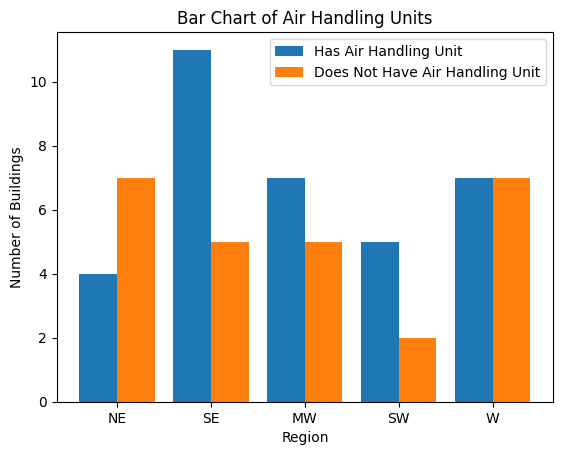

In [ ]:
# Visualizng relationship as bar chart
x = np.arange(5)
width = 0.4

plt.bar(x-0.2, zip_hvac_air['yes'], width, label="Has Air Handling Unit")
plt.bar(x+0.2, zip_hvac_air['no'], width, label="Does Not Have Air Handling Unit")

plt.title('Bar Chart of Air Handling Units')
plt.xlabel('Region')
plt.ylabel('Number of Buildings')
plt.xticks(x, zip_hvac_air['region'])
plt.legend()

plt.show()


In [ ]:
# Convert columns to matrix
air_matrix = np.column_stack((zip_hvac_air['yes'], zip_hvac_air['no']))

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(air_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

test statistic: 3.6860933184462596
p-value: 0.45015180227188323


### Correlation between region -> gas boiler

In [ ]:
zip_hvac_boiler = _deepnote_execute_sql('select \n    region, \n    count(case when "Boiler – gas-fired" = 1 then 1 end) as yes,\n    count(case when "Boiler – gas-fired" = 0 then 1 end) as no\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_boiler

,region,yes,no
0,NE,6,5
1,SE,1,15
2,MW,7,5
3,SW,1,6
4,W,5,9


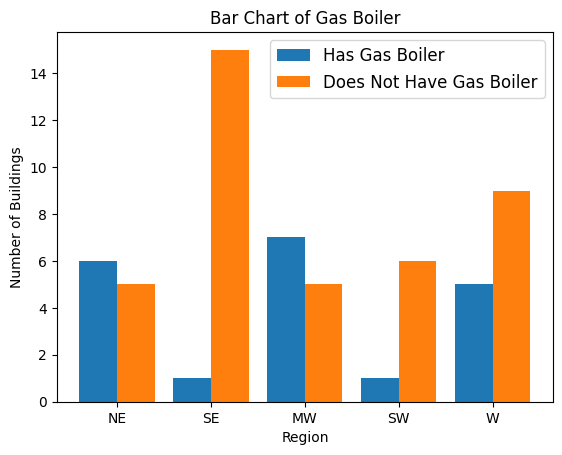

In [ ]:
# Visualizng relationship as bar chart
x = np.arange(5)
width = 0.4

plt.bar(x-0.2, zip_hvac_boiler['yes'], width, label="Has Gas Boiler")
plt.bar(x+0.2, zip_hvac_boiler['no'], width, label="Does Not Have Gas Boiler")

plt.title('Bar Chart of Gas Boiler')
plt.xlabel('Region')
plt.ylabel('Number of Buildings')
plt.xticks(x, zip_hvac_air['region'])
plt.grid(False)
plt.legend(fontsize=12)

plt.show()


In [ ]:
# Convert columns to matrix
boil_matrix = np.column_stack((zip_hvac_boiler['yes'], zip_hvac_boiler['no']))

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(boil_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

test statistic: 12.062094155844155
p-value: 0.016895441300682823


### Correlation between region -> chiller

In [ ]:
zip_hvac_chiller = _deepnote_execute_sql('select \n    region, \n    count(case when "Chiller" = 1 then 1 end) as yes,\n    count(case when "Chiller" = 0 then 1 end) as no\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_chiller

,region,yes,no
0,NE,3,8
1,SE,7,9
2,MW,6,6
3,SW,3,4
4,W,6,8


In [ ]:
# Convert columns to matrix
chill_matrix = np.column_stack((zip_hvac_chiller['yes'], zip_hvac_chiller['no']))

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(chill_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

test statistic: 1.3213358070500922
p-value: 0.8577453395879442


### Correlation between region -> cooling tower

In [ ]:
zip_hvac_cool = _deepnote_execute_sql('select \n    region, \n    count(case when "Cooling tower" = 1 then 1 end) as yes,\n    count(case when "Cooling tower" = 0 then 1 end) as no\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_cool

,region,yes,no
0,NE,3,8
1,SE,10,6
2,MW,6,6
3,SW,1,6
4,W,9,5


In [ ]:
# Convert columns to matrix
cool_matrix = np.column_stack((zip_hvac_cool['yes'], zip_hvac_cool['no']))

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(cool_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

test statistic: 7.929156494228797
p-value: 0.09420802608591582


### Correlation between region -> fan coil units

In [ ]:
zip_hvac_fan = _deepnote_execute_sql('select \n    region, \n    count(case when "Fan coil units" = 1 then 1 end) as yes,\n    count(case when "Fan coil units" = 0 then 1 end) as no\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_fan

,region,yes,no
0,NE,1,10
1,SE,1,15
2,MW,2,10
3,SW,1,6
4,W,2,12


In [ ]:
# Convert columns to matrix
fan_matrix = np.column_stack((zip_hvac_fan['yes'], zip_hvac_fan['no']))

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(fan_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

test statistic: 0.9572233696222917
p-value: 0.9162114612262056


### Correlation between region -> vav

In [ ]:
zip_hvac_vav = _deepnote_execute_sql('select \n    region, \n    count(case when "VAV boxes" = 1 then 1 end) as yes,\n    count(case when "VAV boxes" = 0 then 1 end) as no\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_vav

,region,yes,no
0,NE,1,10
1,SE,2,14
2,MW,2,10
3,SW,0,7
4,W,2,12


In [ ]:
# Convert columns to matrix
vav_matrix = np.column_stack((zip_hvac_vav['yes'], zip_hvac_vav['no']))

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(vav_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

test statistic: 1.3904155144047328
p-value: 0.8458591240644834


### Correlation between region -> HVAC

In [ ]:
zip_hvac_corr = _deepnote_execute_sql('select \n    region, \n    count(case when "Air handling units" = 1 then 1 end) as air_handling,\n    count(case when "Boiler – gas-fired" = 1 then 1 end) as boiler_gas,\n    count(case when "Boiler – oil-fired" = 1 then 1 end) as boiler_oil,\n    count(case when "Chiller" = 1 then 1 end) as chiller,\n    count(case when "Cooling tower" = 1 then 1 end) as cooling_tower,\n    count(case when "Fan coil units" = 1 then 1 end) as fan_coil,\n    count(case when "Heat exchanger" = 1 then 1 end) as heat_exchange,\n    count(case when "Other" = 1 then 1 end) as other,\n    count(case when "VAV boxes" = 1 then 1 end) as vav,\n    count(case when "Water-source heat pumps" = 1 then 1 end) as water_heat_pump\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_corr

,region,air_handling,boiler_gas,boiler_oil,chiller,cooling_tower,fan_coil,heat_exchange,other,vav,water_heat_pump
0,NE,4,6,2,3,3,1,0,3,1,0
1,SE,11,1,0,7,10,1,1,1,2,3
2,MW,7,7,1,6,6,2,0,1,2,0
3,SW,5,1,0,3,1,1,0,0,0,0
4,W,7,5,0,6,9,2,0,2,2,3


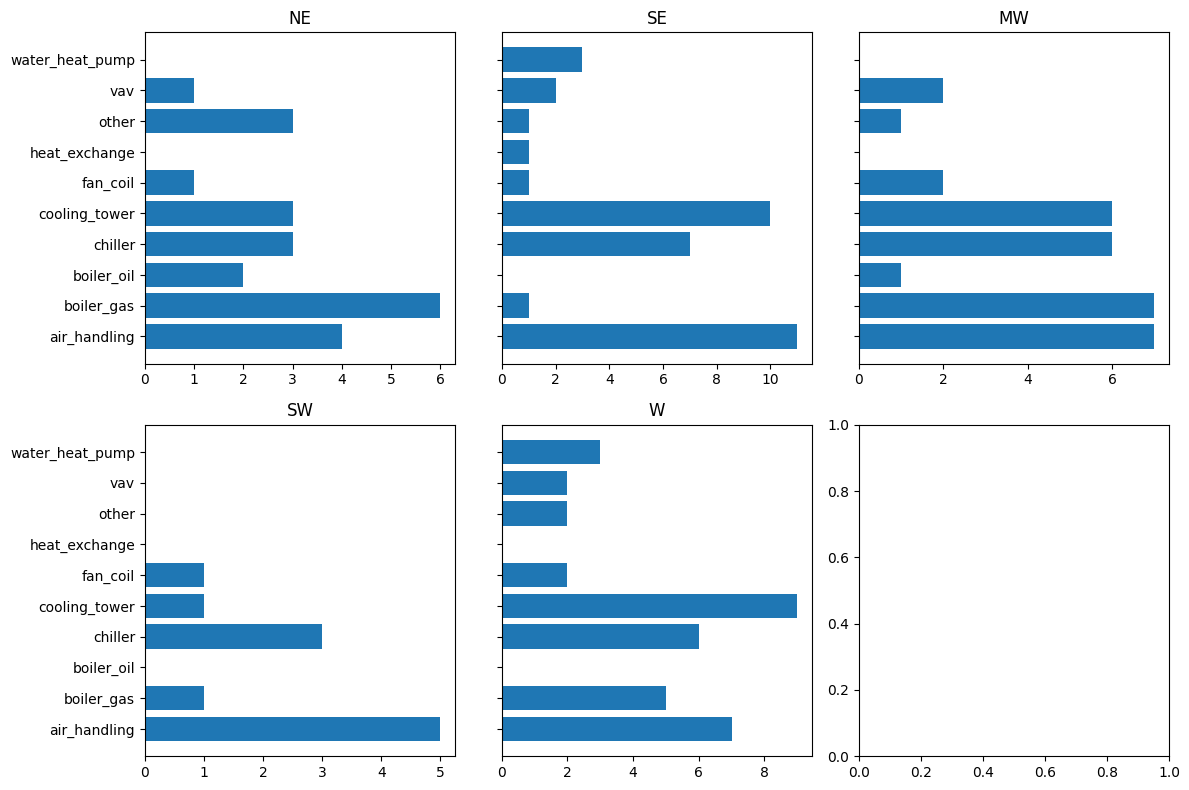

In [ ]:
# Visualizng relationship as bar chart
categories = zip_hvac_corr.columns.tolist()[1:]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].barh(categories, zip_hvac_corr.iloc[0][1:])
axes[0, 0].set_title('NE')

axes[0, 1].barh(categories, zip_hvac_corr.iloc[1][1:])
axes[0, 1].set_title('SE')
axes[0, 1].set_yticklabels([])

axes[0, 2].barh(categories, zip_hvac_corr.iloc[2][1:])
axes[0, 2].set_title('MW')
axes[0, 2].set_yticklabels([])

axes[1, 0].barh(categories, zip_hvac_corr.iloc[3][1:])
axes[1, 0].set_title('SW')

axes[1, 1].barh(categories, zip_hvac_corr.iloc[4][1:])
axes[1, 1].set_title('W')
axes[1, 1].set_yticklabels([])

plt.tight_layout()

plt.show()


In [ ]:
# Convert columns to matrix
zip_corr_matrix = np.column_stack((zip_hvac_corr['air_handling'], zip_hvac_corr['boiler_gas'], zip_hvac_corr['boiler_oil'], zip_hvac_corr['chiller'], zip_hvac_corr['cooling_tower'], zip_hvac_corr['fan_coil'], zip_hvac_corr['heat_exchange'], zip_hvac_corr['other'], zip_hvac_corr['vav'], zip_hvac_corr['water_heat_pump']))

# Perform chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(zip_corr_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

test statistic: 34.25703874291937
p-value: 0.5516504678343085


### HVAC Stratified Chi-Squared Test

In [ ]:
zip_hvac_yncount = _deepnote_execute_sql('select \n    region,\n    \'yes\' as has_sys,\n    sum("Air handling units") as air_handling_count,\n    sum("Boiler – gas-fired") as boiler_gas_count,\n    sum("Boiler – oil-fired") as boiler_oil_count,\n    sum("Chiller") as chiller_count,\n    sum("Cooling tower") as cooling_tower_count,\n    sum("Fan coil units") as fan_coil_count,\n    sum("Heat exchanger") as heat_exchange_count,\n    sum("Other") as other_count,\n    sum("VAV boxes") as vav_count,\n    sum("Water-source heat pumps") as water_heat_pump_count\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region,\n    \'no\' as has_sys,\n    count(*) - sum("Air handling units") as air_handling_count,\n    count(*) - sum("Boiler – gas-fired") as boiler_gas_count,\n    count(*) - sum("Boiler – oil-fired") as boiler_oil_count,\n    count(*) - sum("Chiller") as chiller_count,\n    count(*) - sum("Cooling tower") as cooling_tower_count,\n    count(*) - sum("Fan coil units") as fan_coil_count,\n    count(*) - sum("Heat exchanger") as heat_exchange_count,\n    count(*) - sum("Other") as other_count,\n    count(*) - sum("VAV boxes") as vav_count,\n    count(*) - sum("Water-source heat pumps") as water_heat_pump_count\nfrom zip_hvac_comb\ngroup by region', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_yncount

,region,has_sys,air_handling_count,boiler_gas_count,boiler_oil_count,chiller_count,cooling_tower_count,fan_coil_count,heat_exchange_count,other_count,vav_count,water_heat_pump_count
0,NE,yes,4.0,6.0,2.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
1,SE,yes,11.0,1.0,0.0,7.0,10.0,1.0,1.0,1.0,2.0,3.0
2,MW,yes,7.0,7.0,1.0,6.0,6.0,2.0,0.0,1.0,2.0,0.0
3,SW,yes,5.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
4,W,yes,7.0,5.0,0.0,6.0,9.0,2.0,0.0,2.0,2.0,3.0
5,NE,no,7.0,5.0,9.0,8.0,8.0,10.0,11.0,8.0,10.0,11.0
6,SE,no,5.0,15.0,16.0,9.0,6.0,15.0,15.0,15.0,14.0,13.0
7,MW,no,5.0,5.0,11.0,6.0,6.0,10.0,12.0,11.0,10.0,12.0
8,SW,no,2.0,6.0,7.0,4.0,6.0,6.0,7.0,7.0,7.0,7.0
9,W,no,7.0,9.0,14.0,8.0,5.0,12.0,14.0,12.0,12.0,11.0


In [ ]:
zip_hvac_yncount = _deepnote_execute_sql('select \n    region,\n    \'air_handling_count\' as hvac_sys,\n    sum("Air handling units") as yes,\n    count(*) - sum("Air handling units") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'boiler_gas_count\' as hvac_sys,\n    sum("Boiler – gas-fired") as yes,\n    count(*) - sum("Boiler – gas-fired") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'boiler_oil_count\' as hvac_sys,\n    sum("Boiler – oil-fired") as yes,\n    count(*) - sum("Boiler – oil-fired") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'chiller_count\' as hvac_sys,\n    sum("Chiller") as yes,\n    count(*) - sum("Chiller") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'cooling_tower_count\' as hvac_sys,\n    sum("Cooling tower") as yes,\n    count(*) - sum("Cooling tower") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'fan_coil_count\' as hvac_sys,\n    sum("Fan coil units") as yes,\n    count(*) - sum("Fan coil units") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'heat_exchange_count\' as hvac_sys,\n    sum("Heat exchanger") as yes,\n    count(*) - sum("Heat exchanger") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'other_count\' as hvac_sys,\n    sum("Other") as yes,\n    count(*) - sum("Other") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'vav_count\' as hvac_sys,\n    sum("VAV boxes") as yes,\n    count(*) - sum("VAV boxes") as no\nfrom zip_hvac_comb\ngroup by region\nunion\nselect \n    region, \n    \'water_heat_pump_count\' as hvac_sys,\n    sum("Water-source heat pumps") as yes,\n    count(*) - sum("Water-source heat pumps") as no\nfrom zip_hvac_comb\ngroup by region\n', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_yncount

,region,hvac_sys,yes,no
0,NE,water_heat_pump_count,0.0,11.0
1,SE,water_heat_pump_count,3.0,13.0
2,MW,water_heat_pump_count,0.0,12.0
3,SW,water_heat_pump_count,0.0,7.0
4,W,water_heat_pump_count,3.0,11.0
5,NE,vav_count,1.0,10.0
6,SE,vav_count,2.0,14.0
7,MW,vav_count,2.0,10.0
8,SW,vav_count,0.0,7.0
9,W,vav_count,2.0,12.0


In [ ]:
zip_hvac_yncount2 = _deepnote_execute_sql('select *\nfrom zip_hvac_yncount\nwhere yes > 0', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
zip_hvac_yncount2

,region,hvac_sys,yes,no
0,SE,water_heat_pump_count,3.0,13.0
1,W,water_heat_pump_count,3.0,11.0
2,NE,vav_count,1.0,10.0
3,SE,vav_count,2.0,14.0
4,MW,vav_count,2.0,10.0
5,W,vav_count,2.0,12.0
6,NE,other_count,3.0,8.0
7,SE,other_count,1.0,15.0
8,MW,other_count,1.0,11.0
9,W,other_count,2.0,12.0


In [ ]:
# Create stratified table and calculate correlation
zip_hvac_strat = zip_hvac_yncount2.groupby(['region', 'hvac_sys'])

correlation_results = zip_hvac_strat.apply(lambda x: x[['yes', 'no']].add(0.5).corr().iloc[0, 1])
# print(correlation_results)

contingency_table = zip_hvac_yncount2.pivot_table(index='region', columns='hvac_sys', values=['yes', 'no'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")

'''
zip_strat_matrix = zip_hvac_yncount.pivot_table(index='region', columns='hvac_sys', values=['yes', 'no'])
# zip_strat_matrix = zip_hvac_yncount.pivot_table(index='region', columns='has_sys', values=['air_handling_count', 'boiler_gas_count', 'boiler_oil_count', 'chiller_count', 'cooling_tower_count', 'fan_coil_count', 'heat_exchange_count', 'other_count', 'vav_count', 'water_heat_pump_count'])
print(zip_strat_matrix)
chi2_stat, p_val, dof, expected = chi2_contingency(zip_strat_matrix)

print(f"test statistic: {chi2_stat}")
print(f"p-value: {p_val}")
'''

test statistic: nan
p-value: nan


'\nzip_strat_matrix = zip_hvac_yncount.pivot_table(index=\'region\', columns=\'hvac_sys\', values=[\'yes\', \'no\'])\n# zip_strat_matrix = zip_hvac_yncount.pivot_table(index=\'region\', columns=\'has_sys\', values=[\'air_handling_count\', \'boiler_gas_count\', \'boiler_oil_count\', \'chiller_count\', \'cooling_tower_count\', \'fan_coil_count\', \'heat_exchange_count\', \'other_count\', \'vav_count\', \'water_heat_pump_count\'])\nprint(zip_strat_matrix)\nchi2_stat, p_val, dof, expected = chi2_contingency(zip_strat_matrix)\n\nprint(f"test statistic: {chi2_stat}")\nprint(f"p-value: {p_val}")\n'

This section details correlation analysis specific to key attributes from hypothesis shared to us by Partner.

In [ ]:
# Read in cleaned dataset
retail_df = pd.read_csv('/work/Clean Retail Data/retail_df.csv')

## Correlation of sqft -> wood frame

### Visualize extreme class imbalance of wood frame

### Barplots

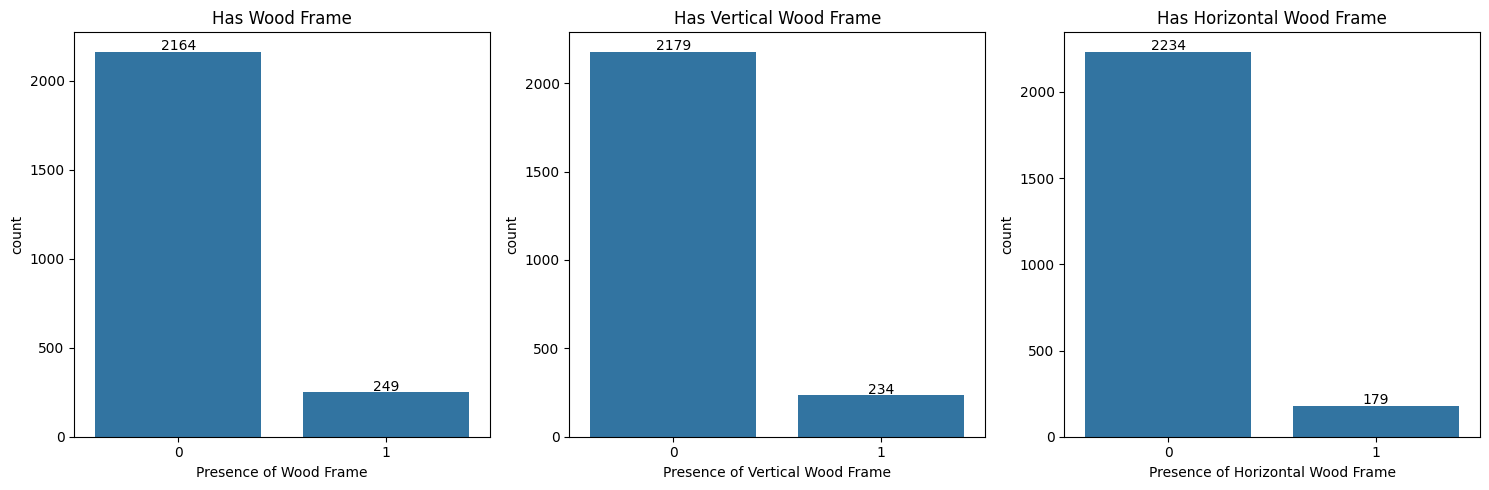

Number of samples with wood frame (has_wood_frame):
has_wood_frame
0    2164
1     249
Name: count, dtype: int64

Number of samples with vertical wood frame (has_vert_wood_frame):
has_vert_wood_frame
0    2179
1     234
Name: count, dtype: int64

Number of samples with horizontal wood frame (has_horz_wood_frame):
has_horz_wood_frame
0    2234
1     179
Name: count, dtype: int64


In [ ]:
# Class imbalance plots
plt.figure(figsize=(15, 5))

# Plot for has_wood_frame
plt.subplot(1, 3, 1)
sns.countplot(x='has_wood_frame', data=retail_df)
plt.title('Has Wood Frame')
plt.xlabel('Presence of Wood Frame')

# Calculate counts for has_wood_frame
wood_frame_counts = retail_df['has_wood_frame'].value_counts()
for i, count in enumerate(wood_frame_counts):
    plt.text(i, count + 10, str(count), ha='center')

# Plot for has_vert_wood_frame
plt.subplot(1, 3, 2)
sns.countplot(x='has_vert_wood_frame', data=retail_df)
plt.title('Has Vertical Wood Frame')
plt.xlabel('Presence of Vertical Wood Frame')

# Calculate counts for has_vert_wood_frame
vert_wood_frame_counts = retail_df['has_vert_wood_frame'].value_counts()
for i, count in enumerate(vert_wood_frame_counts):
    plt.text(i, count + 10, str(count), ha='center')

# Plot for has_horz_wood_frame
plt.subplot(1, 3, 3)
sns.countplot(x='has_horz_wood_frame', data=retail_df)
plt.title('Has Horizontal Wood Frame')
plt.xlabel('Presence of Horizontal Wood Frame')

# Calculate counts for has_horz_wood_frame
horz_wood_frame_counts = retail_df['has_horz_wood_frame'].value_counts()
for i, count in enumerate(horz_wood_frame_counts):
    plt.text(i, count + 10, str(count), ha='center')

plt.tight_layout()
plt.show()

# Print number counts
print("Number of samples with wood frame (has_wood_frame):")
print(wood_frame_counts)
print("\nNumber of samples with vertical wood frame (has_vert_wood_frame):")
print(vert_wood_frame_counts)
print("\nNumber of samples with horizontal wood frame (has_horz_wood_frame):")
print(horz_wood_frame_counts)

### Conditional distributions

<AxesSubplot: xlabel='sqft', ylabel='Density'>

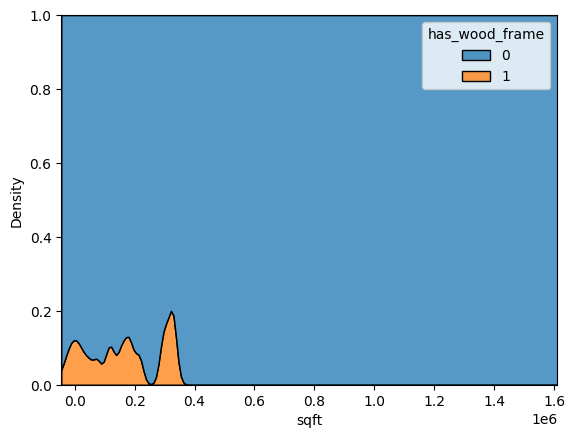

In [ ]:
retail_df = retail_df.dropna(subset=['sqft', 'has_wood_frame'])  # drop missing data

sns.kdeplot(data=retail_df, x='sqft', hue='has_wood_frame', multiple='fill')

<AxesSubplot: xlabel='sqft', ylabel='Density'>

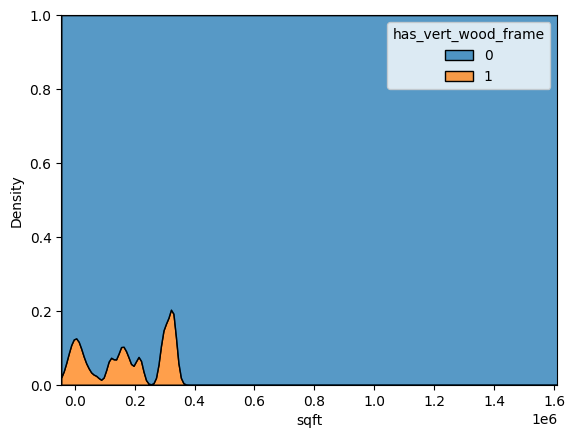

In [ ]:
retail_df = retail_df.dropna(subset=['sqft', 'has_vert_wood_frame'])  # drop missing data

sns.kdeplot(data=retail_df, x='sqft', hue='has_vert_wood_frame', multiple='fill')

<AxesSubplot: xlabel='sqft', ylabel='Density'>

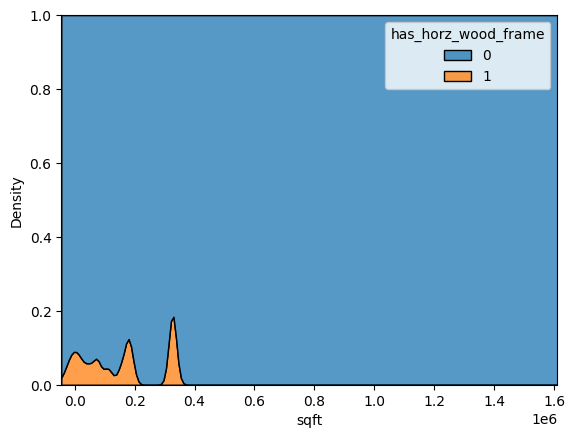

In [ ]:
retail_df = retail_df.dropna(subset=['sqft', 'has_horz_wood_frame'])  # drop missing data

sns.kdeplot(data=retail_df, x='sqft', hue='has_horz_wood_frame', multiple='fill')

### Proportions of binned square feet

/tmp/ipykernel_1708/3451426329.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts_wood_frame = retail_df.groupby('sqft_bin')['has_wood_frame'].value_counts(normalize=True).unstack()
/tmp/ipykernel_1708/3451426329.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts_vert_wood_frame = retail_df.groupby('sqft_bin')['has_vert_wood_frame'].value_counts(normalize=True).unstack()
/tmp/ipykernel_1708/3451426329.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=T

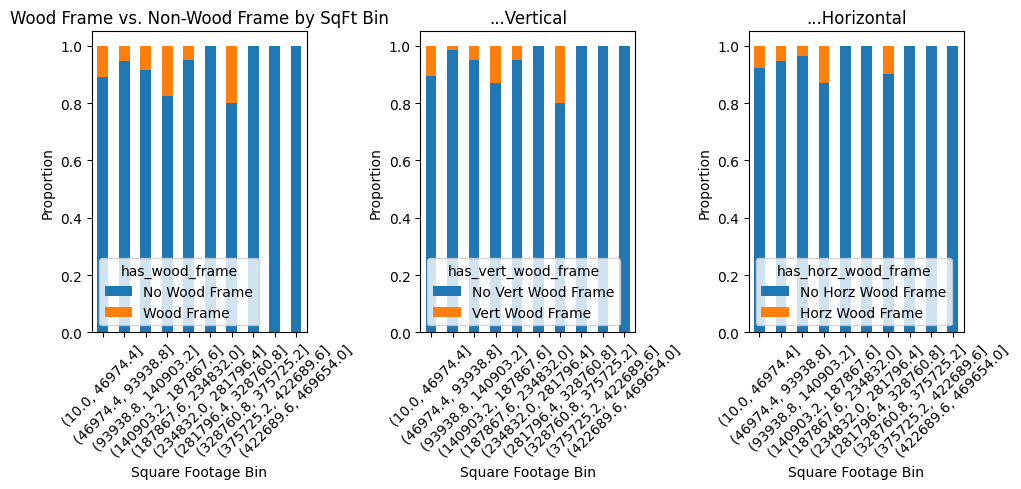

Percentage of 0's out of 1's for each bin (has_wood_frame):
sqft_bin
(10.0, 46974.4]          8.237443
(46974.4, 93938.8]      18.000000
(93938.8, 140903.2]     10.714286
(140903.2, 187867.6]     4.750000
(187867.6, 234832.0]    19.000000
(234832.0, 281796.4]          inf
(281796.4, 328760.8]     4.000000
(328760.8, 375725.2]          inf
(375725.2, 422689.6]          inf
(422689.6, 469654.0]          inf
dtype: float64


In [ ]:
num_bins = 10

# Define the range of square footage
sqft_min = 10
sqft_max = 469654

# Create bins for square footage within the specified range
bins = np.linspace(sqft_min, sqft_max, num_bins + 1)
retail_df['sqft_bin'] = pd.cut(retail_df['sqft'], bins=bins)

# Calculate the proportion of 0's and 1's for each bin for has_wood_frame
bin_counts_wood_frame = retail_df.groupby('sqft_bin')['has_wood_frame'].value_counts(normalize=True).unstack()

# Plot the proportions for has_wood_frame
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
bin_counts_wood_frame.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Wood Frame vs. Non-Wood Frame by SqFt Bin')
plt.xlabel('Square Footage Bin')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='has_wood_frame', labels=['No Wood Frame', 'Wood Frame'])

# Calculate the proportion of 0's and 1's for each bin for has_vert_wood_frame
bin_counts_vert_wood_frame = retail_df.groupby('sqft_bin')['has_vert_wood_frame'].value_counts(normalize=True).unstack()

# Plot the proportions for has_vert_wood_frame
plt.subplot(1, 3, 2)
bin_counts_vert_wood_frame.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('...Vertical')
plt.xlabel('Square Footage Bin')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='has_vert_wood_frame', labels=['No Vert Wood Frame', 'Vert Wood Frame'])

# Calculate the proportion of 0's and 1's for each bin for has_horz_wood_frame
bin_counts_horz_wood_frame = retail_df.groupby('sqft_bin')['has_horz_wood_frame'].value_counts(normalize=True).unstack()

# Plot the proportions for has_horz_wood_frame
plt.subplot(1, 3, 3)
bin_counts_horz_wood_frame.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('...Horizontal')
plt.xlabel('Square Footage Bin')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='has_horz_wood_frame', labels=['No Horz Wood Frame', 'Horz Wood Frame'])

plt.tight_layout()
plt.show()

# Calculate the percentage of 0's out of 1's for each bin
bin_percentages = bin_counts_wood_frame[0] / bin_counts_wood_frame[1]
print("Percentage of 0's out of 1's for each bin (has_wood_frame):")
print(bin_percentages)

### Boxplot

<AxesSubplot: xlabel='has_wood_frame', ylabel='sqft'>

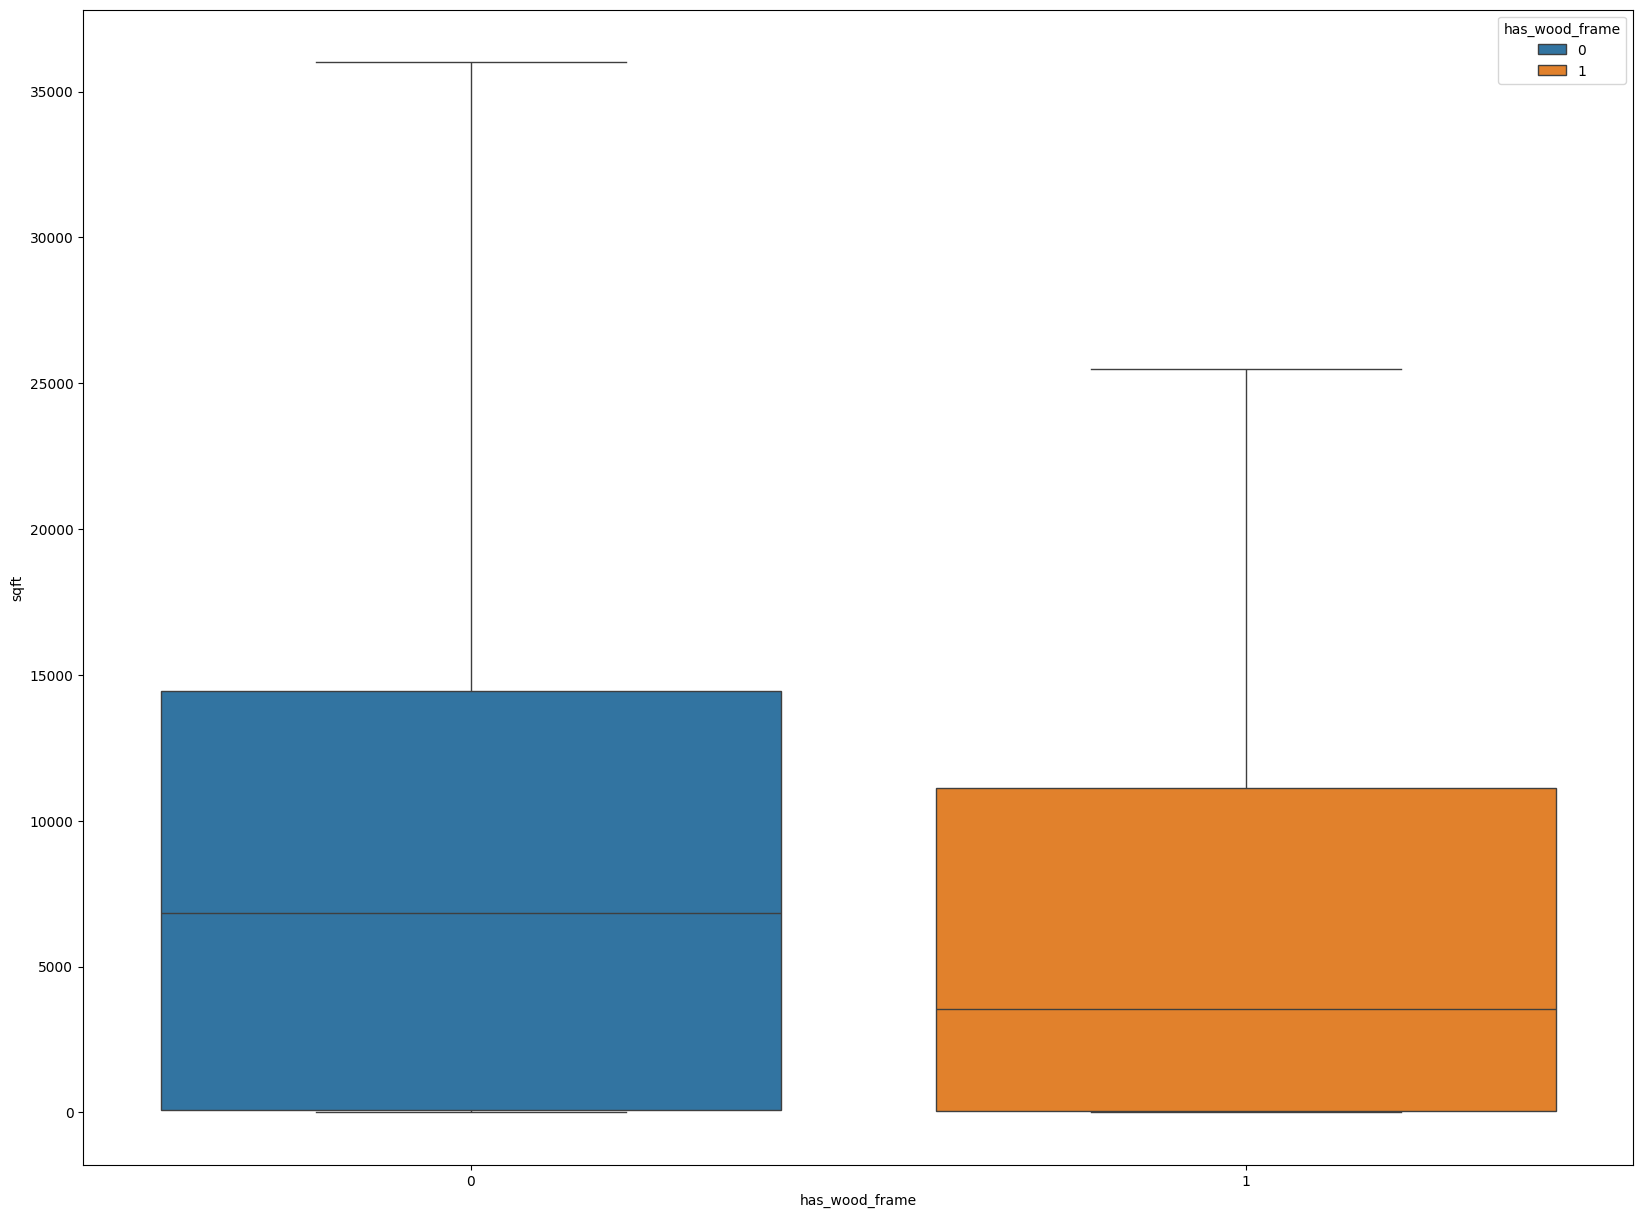

In [ ]:
# Using boxplots to visually compare differences in properties with/without wood frame

retail_df = retail_df.dropna(subset=['sqft', 'has_wood_frame'])

ax = plt.figure(figsize=(20,15))
box = sns.boxplot(x='has_wood_frame', y='sqft', data=retail_df, hue='has_wood_frame', showfliers = False)  # leaves out outliers

box

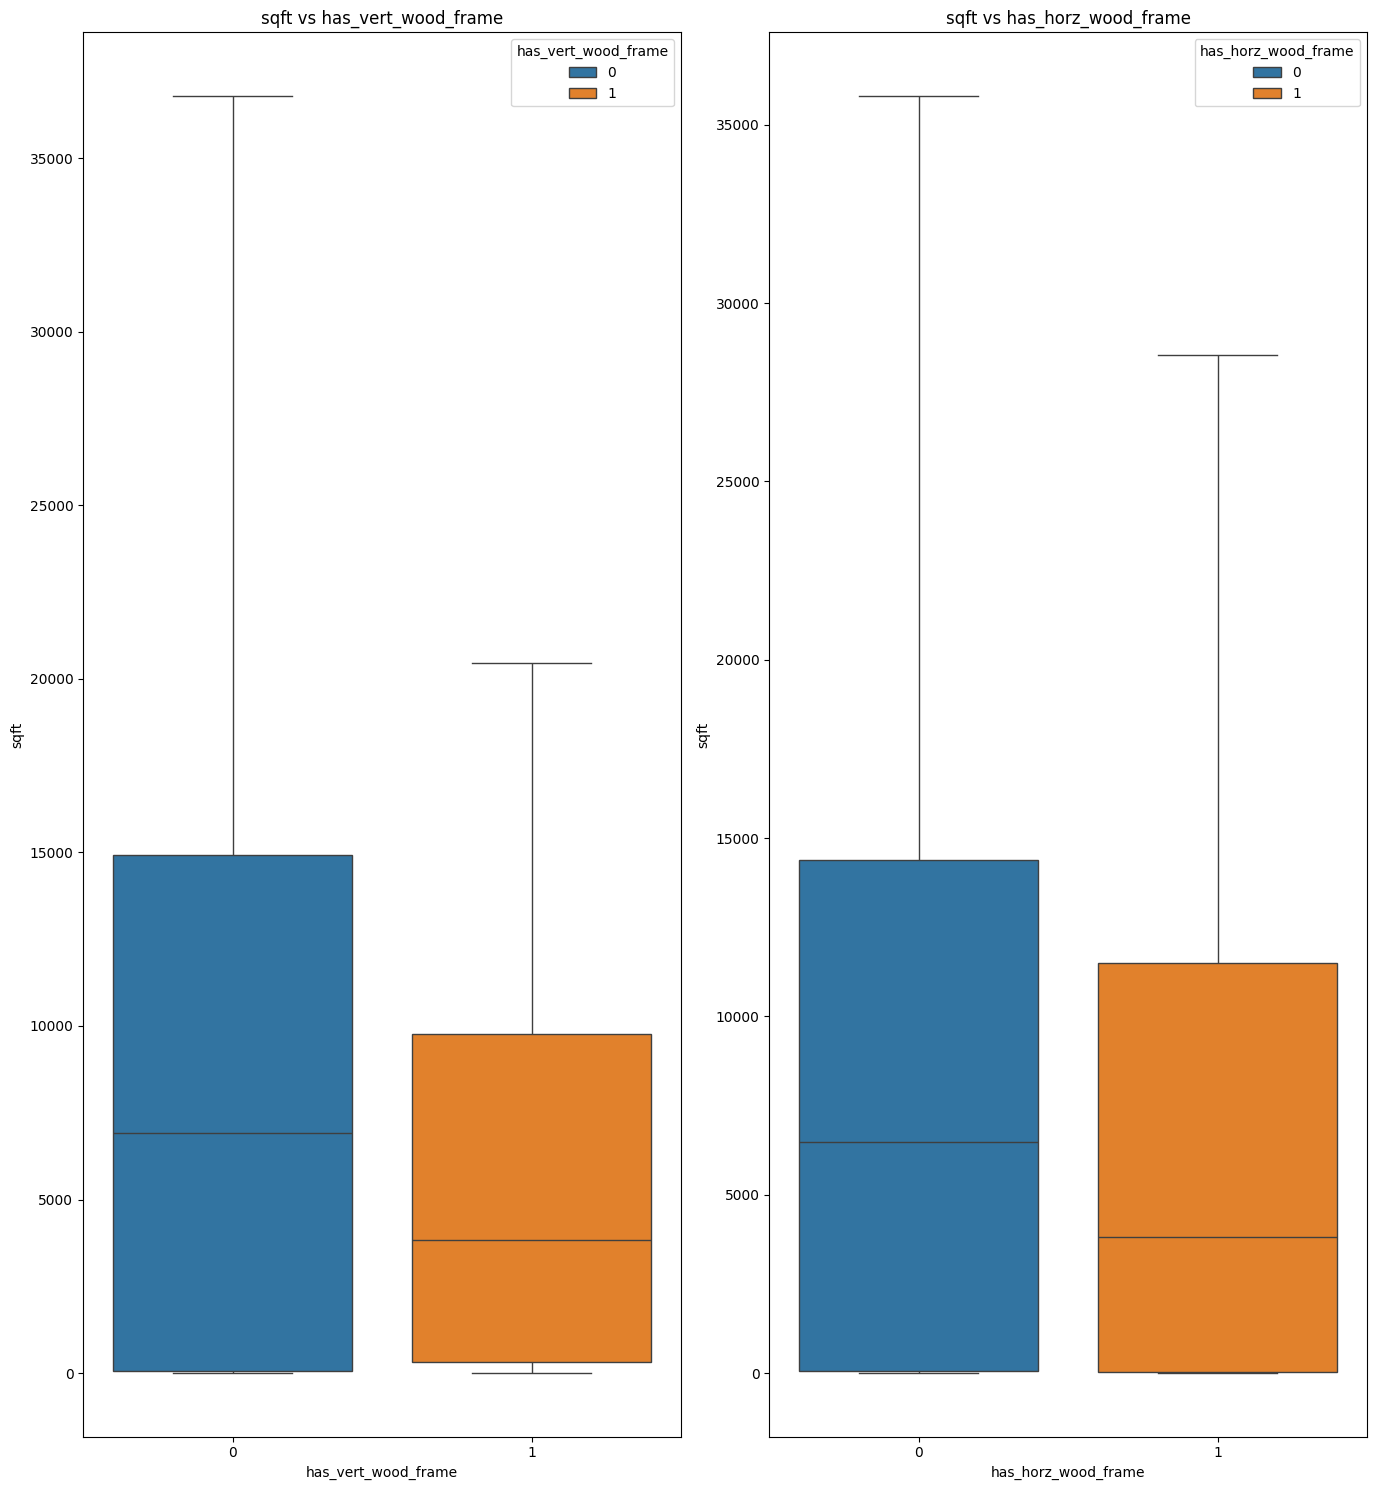

In [ ]:
# Separate boxplots based on which field wood frame was found in 

ax = plt.figure(figsize=(20,15))

# Boxplot for 'has_vert_wood_frame'
plt.subplot(1, 3, 2)
sns.boxplot(x='has_vert_wood_frame', y='sqft', data=retail_df, hue='has_vert_wood_frame', showfliers=False)
plt.title('sqft vs has_vert_wood_frame')

# Boxplot for 'has_horz_wood_frame'
plt.subplot(1, 3, 3)
sns.boxplot(x='has_horz_wood_frame', y='sqft', data=retail_df, hue='has_horz_wood_frame', showfliers=False)
plt.title('sqft vs has_horz_wood_frame')

plt.tight_layout()
plt.show()

### Statistics (two-sample t-test)

In [ ]:
# Using unpaired t-test to compare differences in properties with/without wood frame

# Splitting df into WF and not WF
grouped = retail_df.groupby('has_wood_frame')

retail_wood_has = (grouped.get_group(0))
retail_wood_has = retail_wood_has['sqft'].astype(str).astype(float)
retail_wood_not = (grouped.get_group(1))
retail_wood_not = retail_wood_not['sqft'].astype(str).astype(float)

# Seeing sample sizes:
# retail_wood_has length: 2106
# retail_wood_not length: 307

# Seeing if variance has equal variance
# print(np.var(retail_wood_has), np.var(retail_wood_not))
# 5341368496.004057 2523527844.3556747

t_statistic, p_value = stats.ttest_ind(retail_wood_has, retail_wood_not, equal_var=False) # diff variances

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.601276658329614
P-value: 0.00959434314095748


In [ ]:
# Splitting df into has_vert_wood_frame and not has_vert_wood_frame
grouped_vert = retail_df.groupby('has_vert_wood_frame')

retail_wood_has_vert = grouped_vert.get_group(1)['sqft'].astype(float)
retail_wood_not_vert = grouped_vert.get_group(0)['sqft'].astype(float)

# Splitting df into has_horz_wood_frame and not has_horz_wood_frame
grouped_horz = retail_df.groupby('has_horz_wood_frame')

retail_wood_has_horz = grouped_horz.get_group(1)['sqft'].astype(float)
retail_wood_not_horz = grouped_horz.get_group(0)['sqft'].astype(float)

# Calculate t-statistics for has_vert_wood_frame
t_statistic_vert, p_value_vert = stats.ttest_ind(retail_wood_has_vert, retail_wood_not_vert, equal_var=False) 

# Calculate t-statistics for has_horz_wood_frame
t_statistic_horz, p_value_horz = stats.ttest_ind(retail_wood_has_horz, retail_wood_not_horz, equal_var=False) 

# Output the results for has_vert_wood_frame
print("T-statistic for has_vert_wood_frame:", t_statistic_vert)
print("P-value for has_vert_wood_frame:", p_value_vert)

# Output the results for has_horz_wood_frame
print("\nT-statistic for has_horz_wood_frame:", t_statistic_horz)
print("P-value for has_horz_wood_frame:", p_value_horz)

T-statistic for has_vert_wood_frame: -3.7716585105890883
P-value for has_vert_wood_frame: 0.00018461272589829385

T-statistic for has_horz_wood_frame: -3.044310486959216
P-value for has_horz_wood_frame: 0.0025370543542828482


Interpretation: retail properties with vertical wood frames have a lower sample mean than retail properties that do not have vertical wood frames (same for horizontal wood frames).

In [ ]:
# try spearman for correlation
from scipy.stats import spearmanr

# Calculate Spearman's correlation
correlation, p_value = spearmanr(retail_df['sqft'].astype(float), retail_df['has_wood_frame'])

print(f"Spearman's correlation coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman's correlation coefficient: -0.044
P-value: 0.031


In [ ]:
# try point biserial
correlation, p_value = pointbiserialr(retail_df['sqft'].astype(float), retail_df['has_wood_frame'])

# Output the results
print(f"Point-Biserial Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation Coefficient: -0.034
P-value: 0.091


## Correlation of sqft -> concrete

### Conditional distributions

<AxesSubplot: xlabel='sqft', ylabel='Density'>

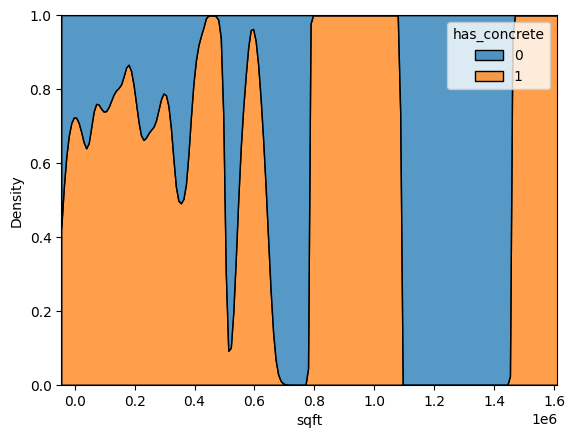

In [ ]:
retail_cmu_df = retail_df.dropna(subset=['sqft', 'has_concrete'])  # drop missing data

sns.kdeplot(data=retail_cmu_df, x='sqft', hue='has_concrete', multiple='fill')

### Boxplot

<AxesSubplot: xlabel='has_concrete', ylabel='sqft'>

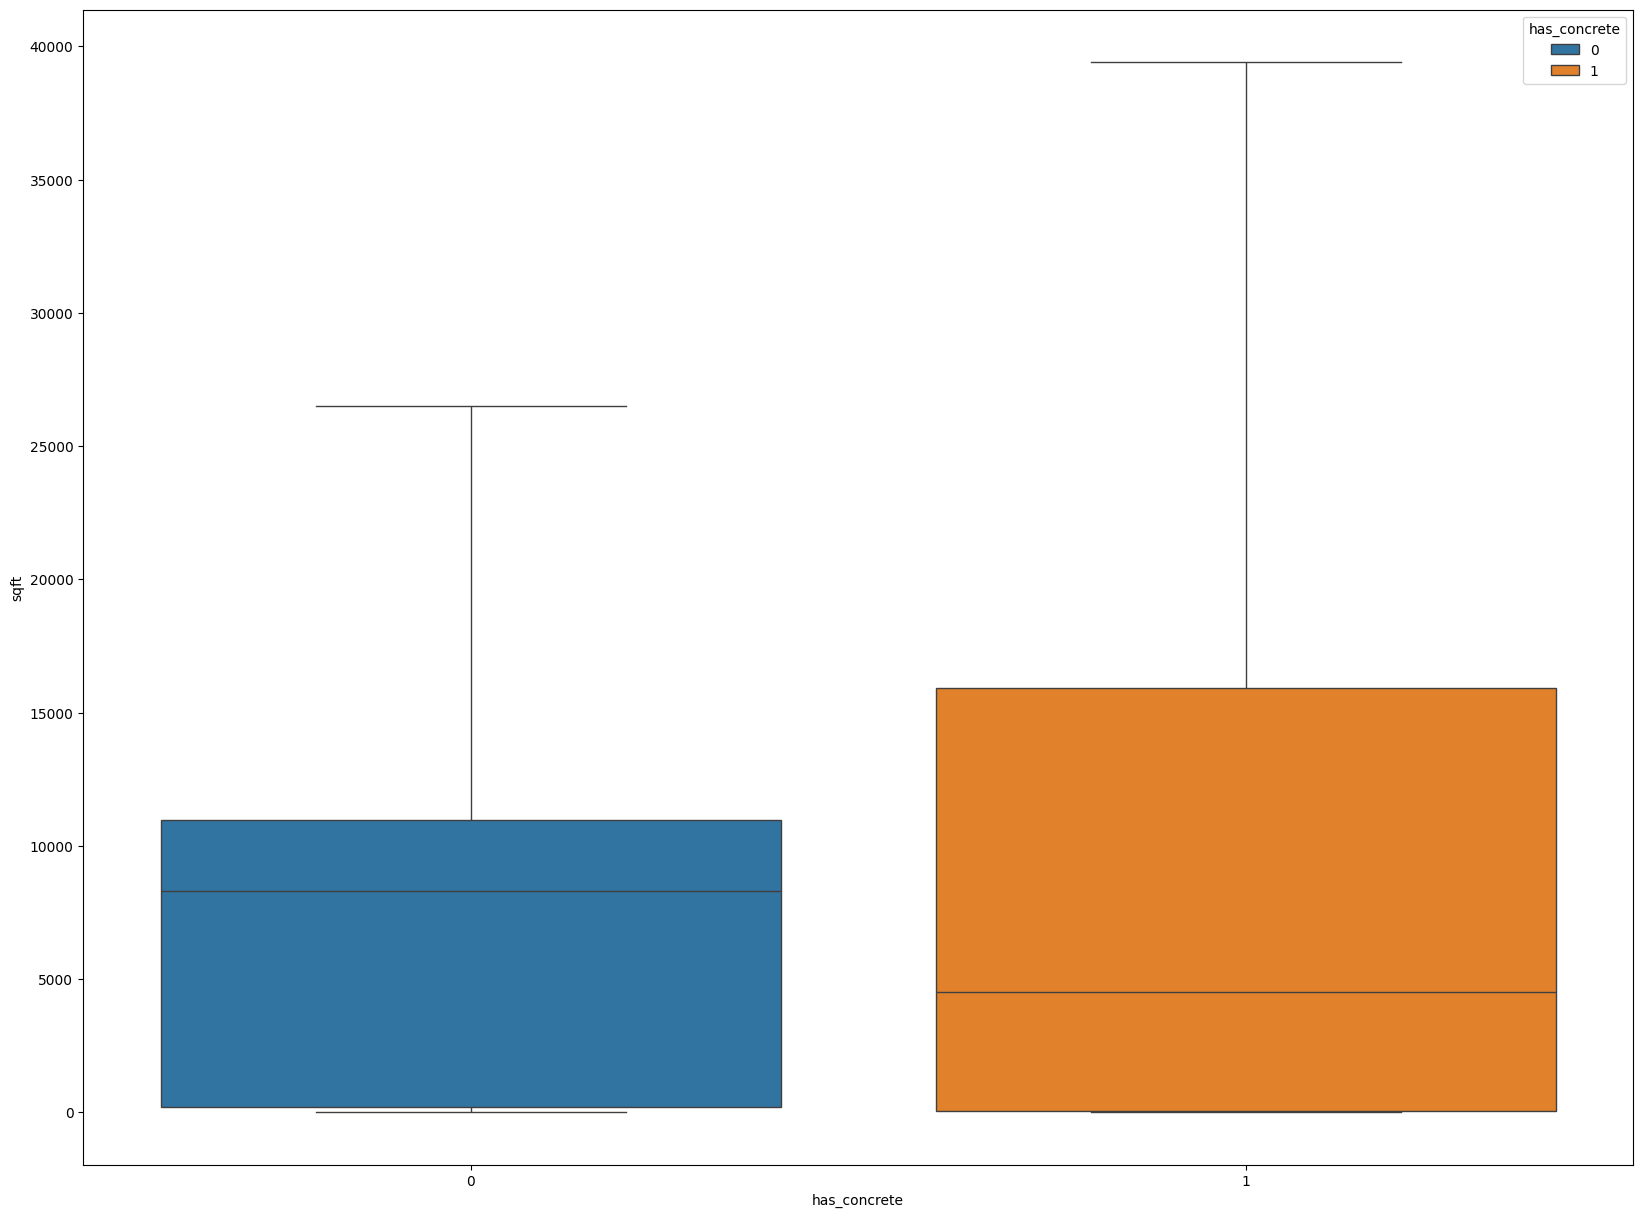

In [ ]:
# Using boxplots to visually compare differences in properties with/without concrete

retail_cmu_df = retail_df.dropna(subset=['sqft', 'has_concrete'])

ax = plt.figure(figsize=(20,15))
box = sns.boxplot(x='has_concrete', y='sqft', data=retail_cmu_df, hue='has_concrete', showfliers = False)  # leaves out outliers

box

### Statistics

In [ ]:
# Using unpaired t-test to compare differences in properties with/without concrete

# Splitting df into concrete and not concrete
grouped = retail_df.groupby('has_concrete')

retail_cmu_has = (grouped.get_group(1))
retail_cmu_has = retail_cmu_has['sqft'].astype(str).astype(float)
retail_cmu_not = (grouped.get_group(0))
retail_cmu_not = retail_cmu_not['sqft'].astype(str).astype(float)

# Seeing sample sizes:
# retail_cmu_has length: 1809
# retail_cmu_not length: 604

# Seeing if variance has equal variance
# print(np.var(retail_cmu_has), np.var(retail_cmu_not))
# 5571215968.609758 3167155651.6429105

t_statistic, p_value = stats.ttest_ind(retail_cmu_has, retail_cmu_not, equal_var=False) # diff variances

# Output the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.7055572327135163
P-value: 0.4805876036178296


In [ ]:
# again, try Spearman to account for violation of normality:
corr, p_value = spearmanr(retail_df['has_concrete'], retail_df['sqft'])
print("Spearman's rank correlation coefficient:", corr)
print("P-value:", p_value)

Spearman's rank correlation coefficient: -0.04443611830289376
P-value: 0.02905412929261408


In [ ]:
# second alternative: point-biserial 
from scipy.stats import pointbiserialr

# Calculate Point-Biserial Correlation Coefficient
corr, p_value = pointbiserialr(retail_df['has_concrete'], retail_df['sqft'])

# Output the results
print("Point-Biserial Correlation Coefficient:", corr)
print("P-value:", p_value)


Point-Biserial Correlation Coefficient: 0.014603799143574757
P-value: 0.47335023198270754


## Correlation of zip code -> glu-lam

### Count plot

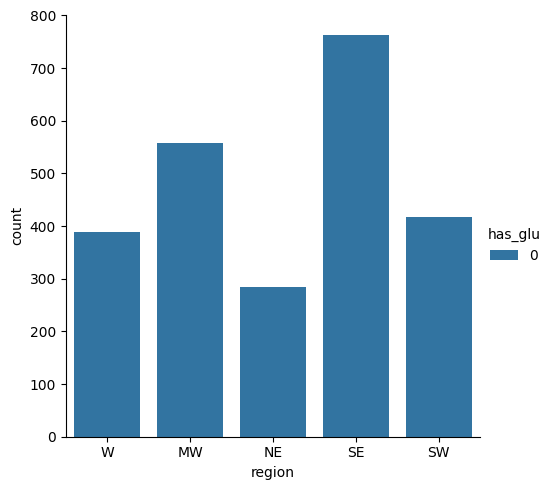

In [ ]:
# Filter out rows with missing values
retail_glu_df = retail_df.dropna(subset=['region', 'has_glu'])

sns.catplot(x='region', hue='has_glu', data=retail_glu_df, kind="count")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa72ad5b-4609-409b-ae7e-8a5fd2e73142' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>